## Batch Normaliation on CIFAR-10 

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from matplotlib import pyplot as plt
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [0]:
num_classes = 10
data_augmentation = True
num_predictions = 20
# batch_size = 128
# epochs = 30

In [0]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Model having Batch Normalization Layer

In [0]:
def model1(model,batch_size,epochs):
    
        model.add(Conv2D(32, (3, 3), padding='same',
                         input_shape=x_train.shape[1:]))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        
        model.add(Conv2D(32, (3, 3)))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(BatchNormalization())
        model.add(Dropout(rate = 0.25))

        model.add(Conv2D(64, (3, 3), padding='same'))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        
        model.add(Conv2D(64, (3, 3)))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(BatchNormalization())
        model.add(Dropout(rate = 0.25))

        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(rate = 0.5))
        model.add(Dense(num_classes))
        model.add(Activation('softmax'))
        
        
        opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)
       

        # Let's train the model
        model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
        
        history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
        return history

In [0]:
tmodel1 = Sequential()
train_model1 = model1(tmodel1,128,40)

W0702 08:29:21.832289 139702379644800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 08:29:21.870557 139702379644800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 08:29:21.877010 139702379644800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0702 08:29:21.927551 139702379644800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0702 08:29:21.928689 1397023796

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 771s 15ms/step - loss: 2.1962 - acc: 0.3327 - val_loss: 1.3828 - val_acc: 0.5123
Epoch 2/40
50000/50000 [==============================] - 780s 16ms/step - loss: 1.6013 - acc: 0.4549 - val_loss: 1.3162 - val_acc: 0.5311
Epoch 3/40
50000/50000 [==============================] - 785s 16ms/step - loss: 1.4117 - acc: 0.5008 - val_loss: 1.2178 - val_acc: 0.5646
Epoch 4/40
50000/50000 [==============================] - 775s 16ms/step - loss: 1.3000 - acc: 0.5381 - val_loss: 1.1849 - val_acc: 0.5804
Epoch 5/40
50000/50000 [==============================] - 762s 15ms/step - loss: 1.2138 - acc: 0.5698 - val_loss: 1.1341 - val_acc: 0.5968
Epoch 6/40
50000/50000 [==============================] - 757s 15ms/step - loss: 1.1406 - acc: 0.5957 - val_loss: 1.1320 - val_acc: 0.6082
Epoch 7/40
50000/50000 [==============================] - 743s 15ms/step - loss: 1.0706 - acc: 0.6195 - val_loss: 0.

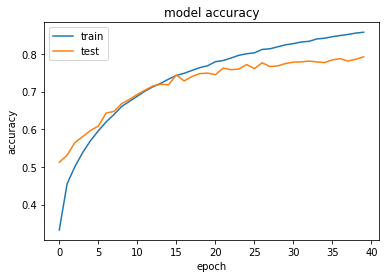

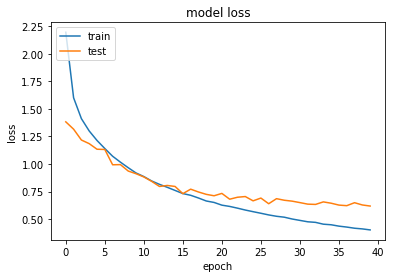

In [0]:
# summarize history for accuracy
plt.plot(train_model1.history['acc'])
plt.plot(train_model1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_model1.history['loss'])
plt.plot(train_model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model with no Batch Normalization

In [0]:
def model2(model,batch_size,epochs):
    
        model.add(Conv2D(32, (3, 3), padding='same',
                         input_shape=x_train.shape[1:]))
        model.add(Activation('relu'))
        
        model.add(Conv2D(32, (3, 3)))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))

        model.add(Conv2D(64, (3, 3), padding='same'))
        model.add(Activation('relu'))
        
        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))

        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(rate = 0.5))
        model.add(Dense(num_classes))
        model.add(Activation('softmax'))
        
        
        opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)
       

        # Let's train the model
        model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
        
        history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
        return history

In [0]:
tmodel2 = Sequential()
train_model2 = model2(tmodel2,128,40)

W0703 05:24:32.116563 139859960416128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0703 05:24:32.172583 139859960416128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0703 05:24:32.189921 139859960416128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0703 05:24:32.245065 139859960416128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0703 05:24:32.255280 139859960416128 deprecation_wrapp

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 485s 10ms/step - loss: 1.9187 - acc: 0.2935 - val_loss: 1.6017 - val_acc: 0.4179
Epoch 2/40
50000/50000 [==============================] - 484s 10ms/step - loss: 1.5802 - acc: 0.4235 - val_loss: 1.4580 - val_acc: 0.4723
Epoch 3/40
50000/50000 [==============================] - 488s 10ms/step - loss: 1.4570 - acc: 0.4700 - val_loss: 1.3587 - val_acc: 0.5152
Epoch 4/40
50000/50000 [==============================] - 487s 10ms/step - loss: 1.3669 - acc: 0.5107 - val_loss: 1.3102 - val_acc: 0.5265
Epoch 5/40
50000/50000 [==============================] - 487s 10ms/step - loss: 1.3107 - acc: 0.5303 - val_loss: 1.2327 - val_acc: 0.5650
Epoch 6/40
50000/50000 [==============================] - 485s 10ms/step - loss: 1.2588 - acc: 0.5502 - val_loss: 1.1653 - val_acc: 0.5913
Epoch 7/40
50000/50000 [==============================] - 473s 9ms/step - loss: 1.2151 - acc: 0.5690 - val_loss: 1.1

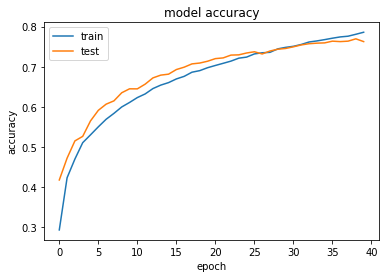

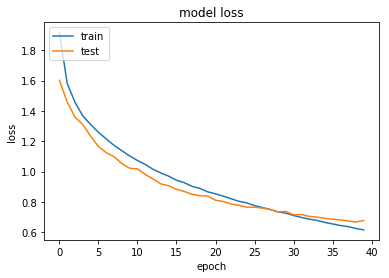

In [0]:
# summarize history for accuracy
plt.plot(train_model2.history['acc'])
plt.plot(train_model2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_model2.history['loss'])
plt.plot(train_model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()